In [1]:
# -----------------------------
# Imports & Setup
# -----------------------------
import pandas as pd
from pathlib import Path
import sys
import joblib


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


project_root = Path.cwd().resolve().parent 
sys.path.append(str(project_root))

from src.data.loader import CreditCardDataLoader
from src.explainability import ModelExplainability
from src.utils.io_utils import save_dataframe


In [2]:
model_path = "../models/random_forest_credit_data.joblib"
preprocessor_path = "../models/preprocessor_credit_data.joblib"

# Load feature-engineered data
credit_df = CreditCardDataLoader("../data/processed/credit_data_cleaned.csv").load()

NUMERIC_FEATURES = [col for col in credit_df.columns if col != 'Class']  # V1-V28 + Time + Amount
CATEGORICAL_FEATURES = []  # no categorical columns
TARGET = 'Class'

# Initialize explainability class
explainer = ModelExplainability(
    model_path=model_path,
    preprocessor_path=preprocessor_path,
    X=credit_df[NUMERIC_FEATURES + CATEGORICAL_FEATURES],
    y=credit_df[TARGET]
)

2025-12-30 21:24:29,172 - INFO - Initializing ModelExplainability
2025-12-30 21:24:30,188 - INFO - ModelExplainability initialized successfully


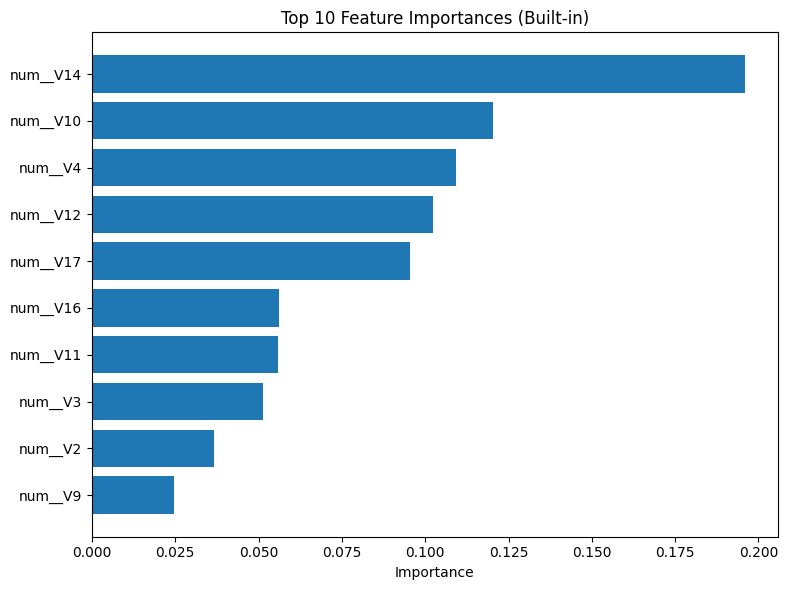

,feature,importance
14,num__V14,0.195931
10,num__V10,0.120385
4,num__V4,0.109357
12,num__V12,0.102438
17,num__V17,0.095409
16,num__V16,0.056158
11,num__V11,0.055897
3,num__V3,0.051306
2,num__V2,0.036550
9,num__V9,0.024697


In [3]:
# ----------------------------
# Built-in feature importance (RF only)
# ----------------------------
explainer.plot_builtin_feature_importance()

2025-12-30 21:24:30,471 - INFO - Computing SHAP values
2025-12-30 21:24:30,486 - INFO - Using TreeExplainer


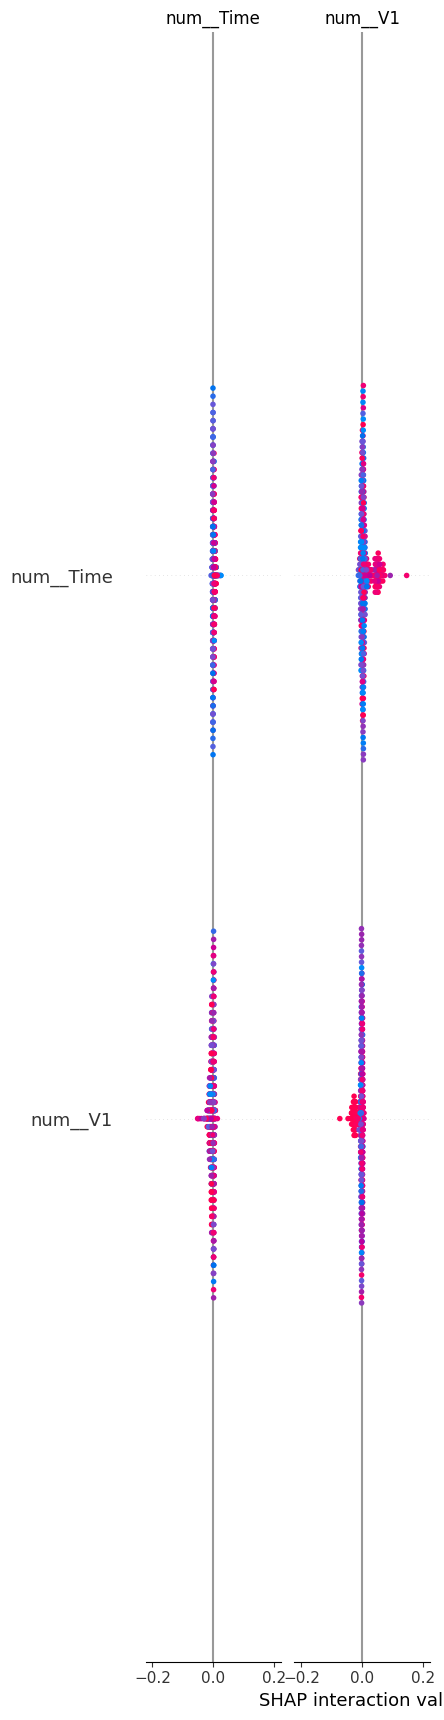

In [4]:
# ----------------------------
# SHAP Summary Plot
# ----------------------------
explainer.plot_shap_summary()

In [5]:
# ----------------------------
# SHAP Force Plots for key cases
# ----------------------------
explainer.plot_force_plot_for_case("TP")


2025-12-30 21:24:36,406 - INFO - Generating force plot for case: TP


In [6]:
explainer.plot_force_plot_for_case("FP")


2025-12-30 21:24:36,468 - INFO - Generating force plot for case: FP


In [7]:
explainer.plot_force_plot_for_case("FN")

2025-12-30 21:24:36,506 - INFO - Generating force plot for case: FN


In [8]:
# ----------------------------
# Top 5 SHAP Drivers
# ----------------------------
top_drivers = explainer.get_top_drivers()
print(top_drivers)


2025-12-30 21:24:36,541 - INFO - Detected 3D SHAP array, selecting positive class (index 1)


     feature  mean_abs_shap
14  num__V14       0.077946
4    num__V4       0.073506
12  num__V12       0.066831
3    num__V3       0.052844
11  num__V11       0.048217
